###Created By:

### **Udipta Koushik Das**

###**170310007053**

In [19]:
pwd


'/content'

## Importing necessary library

In [20]:
import numpy as np
import pandas as pd
import cv2
import os
import random
import sys
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

## Initializing mean and variance of images

In [21]:
def initBackground(initImage):
    img_arr = mpimg.imread(initImage)
    mean = img_arr
    variance = 9*np.ones(img_arr.shape)
    return(mean,variance)

## Chebyshev Inequality is used to classify foreground and background pixels of images

In [22]:
def ForegroundDetection(img_file,mean,variance,lmda):
    img = cv2.imread(img_file) 
    d = img - mean
    y = variance*(lmda**2)
    d_2 = np.square(d)
    I = d_2 - y
    mask = np.all(I>0,axis=2)
    rI = 255*mask.astype(int)
    rI = rI.astype(np.uint8)
    return(rI)

## Voting is used to reduce noise

In [23]:
def Voting(rI,eta,m,n):
    r,c = rI.shape
    cI = np.zeros((rI.shape[0],rI.shape[1]))
    for i in range(m,r-1-m):
        for j in range(n,c-1-n):
            img_patch = rI[i-m:i,j-n:j]
            y_unq, counts = np.unique(img_patch,return_counts=True)
            if len(counts) == 1 and y_unq[0] == 1:
                cI[i,j] = 255
            if len(counts)>1:
                if counts[1] > eta*m*n:
                    cI[i,j] = 255
    cI = cI.astype(np.uint8)
    return cI

## Update the mean and variance images using a weighted average scheme

In [24]:
def meanvarUpdate(cI,img_path,M,V,alpha):
    img = mpimg.imread(img_path)
    mean_upd = np.zeros(img.shape)
    var_upd = np.zeros(img.shape)
    d = img - M
    d_2 = np.square(d)
    for i in range(cI.shape[0]):
        for j in range(cI.shape[1]):
            if cI[i,j] == 0:
                mean_upd[i,j,:] = (1-alpha)*M[i,j,:] + alpha*img[i,j,:]
                var_upd[i,j,:] = (1-alpha)*(V[i,j,:] + alpha*d_2[i,j,:])
                var_upd[i,j,:] = np.clip(var_upd[i,j,:],a_min = 9,a_max = None)
    return(mean_upd,var_upd)

## Function for background subtraction

In [15]:
!apt install unzip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
unzip is already the newest version (6.0-21ubuntu1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [16]:
!unzip /content/AirStripVideo.zip

Archive:  /content/AirStripVideo.zip
replace AirStrip Video/Images/AirstripRunAroundFeb2006_1300.bmp? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: AirStrip Video/Images/AirstripRunAroundFeb2006_1300.bmp  
  inflating: AirStrip Video/Images/AirstripRunAroundFeb2006_1301.bmp  
  inflating: AirStrip Video/Images/AirstripRunAroundFeb2006_1302.bmp  
  inflating: AirStrip Video/Images/AirstripRunAroundFeb2006_1303.bmp  
  inflating: AirStrip Video/Images/AirstripRunAroundFeb2006_1304.bmp  
  inflating: AirStrip Video/Images/AirstripRunAroundFeb2006_1305.bmp  
  inflating: AirStrip Video/Images/AirstripRunAroundFeb2006_1306.bmp  
  inflating: AirStrip Video/Images/AirstripRunAroundFeb2006_1307.bmp  
  inflating: AirStrip Video/Images/AirstripRunAroundFeb2006_1308.bmp  
  inflating: AirStrip Video/Images/AirstripRunAroundFeb2006_1309.bmp  
  inflating: AirStrip Video/Images/AirstripRunAroundFeb2006_1310.bmp  
  inflating: AirStrip Video/Images/AirstripRunAroundFeb2006_1311.bmp  
  infl

In [25]:
def Background_Subtraction(img_dir,lmda,eta,m,n,alpha):
    
    img_file_name = os.listdir(img_dir)
    initImage = os.path.join(img_dir,img_file_name[0])
    mean, variance = initBackground(initImage)
    
    for i in range(7,20):
        img_path = os.path.join(img_dir,img_file_name[i])
        
        fig, ax = plt.subplots(1,2,figsize=(10,10))
        rI = ForegroundDetection(img_path,mean,variance,lmda)
        #ax[0].imshow(rI,cmap="gray")
        
        cI = Voting(rI,eta,m,n)
        mean, variance = meanvarUpdate(cI,img_path,mean,variance,alpha)
        ax[0].imshow(cI,cmap="gray")
        
        img = cv2.imread(img_path)
        ax[1].imshow(img,cmap="gray")
        
        plt.show()
    return(mean,variance)

## Applying Background subtraction by varying lambda and eta

For lambda = 0.7 and eta = 0.7


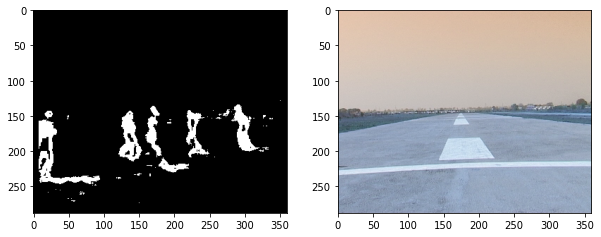

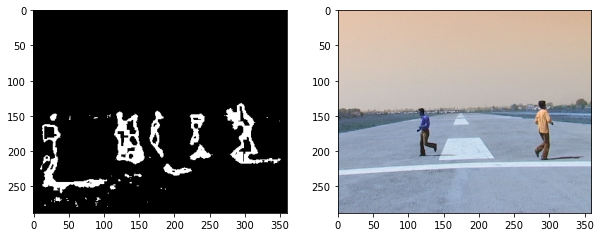

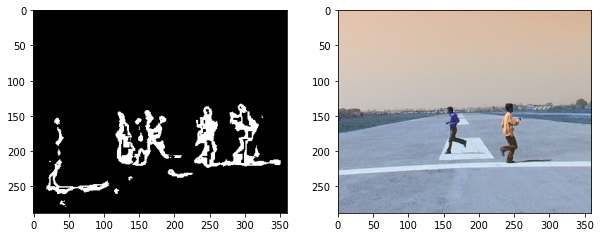

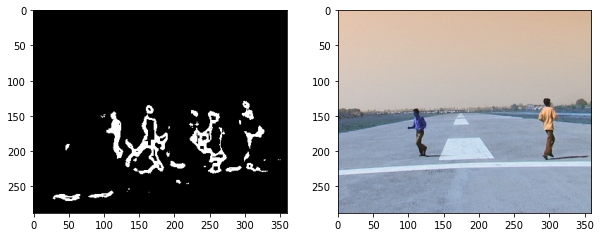

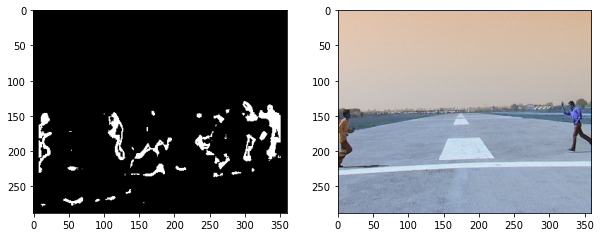

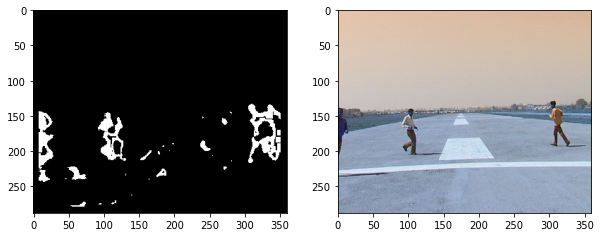

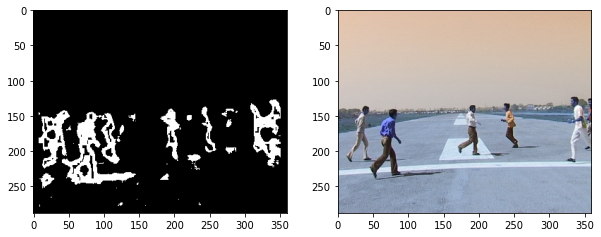

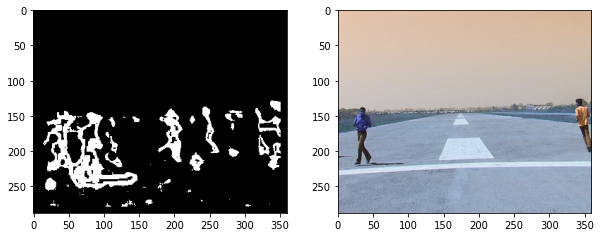

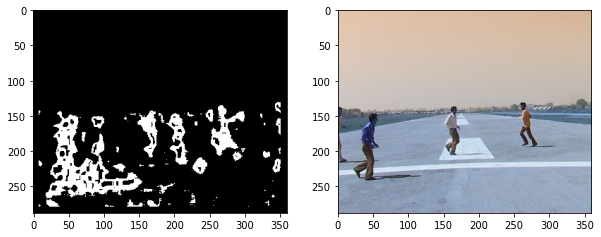

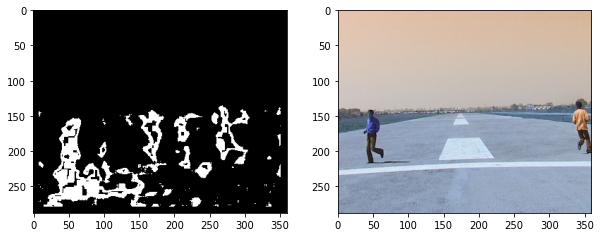

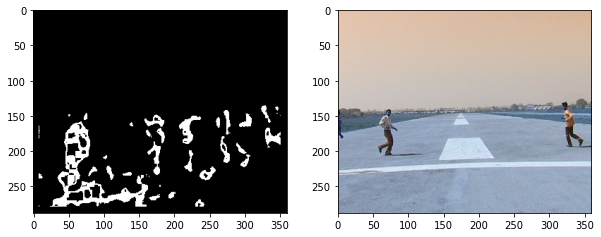

For lambda = 0.72 and eta = 0.72


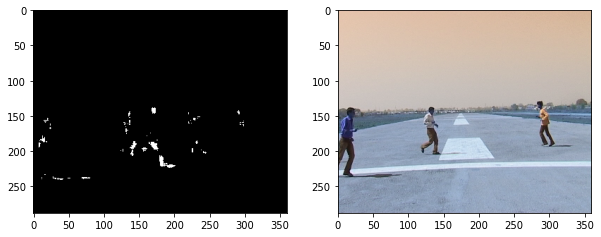

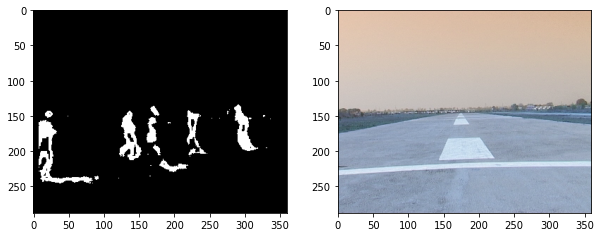

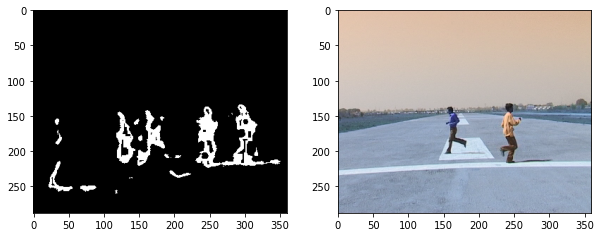

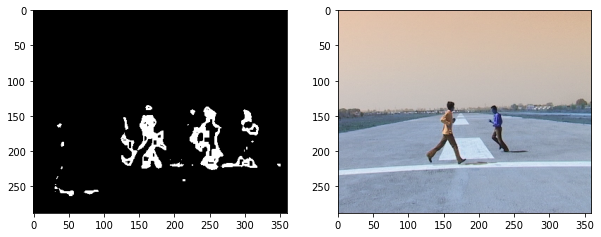

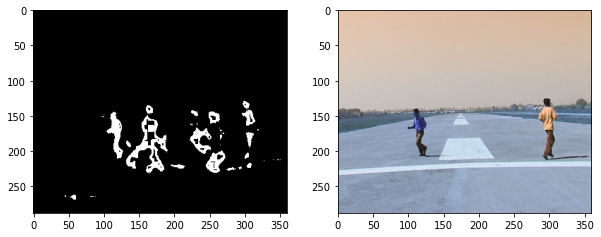

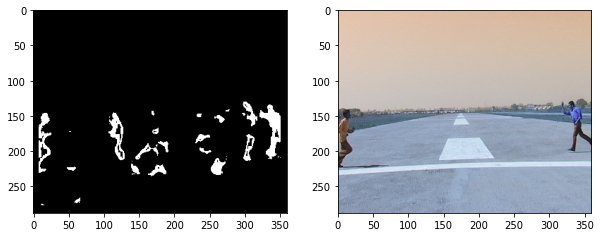

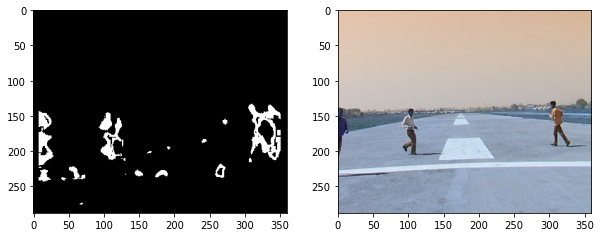

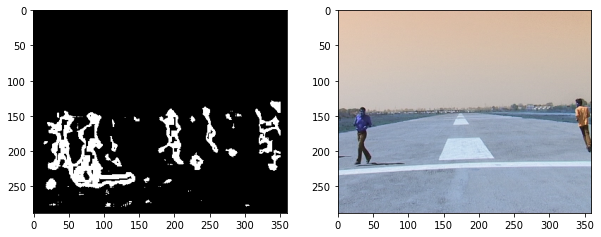

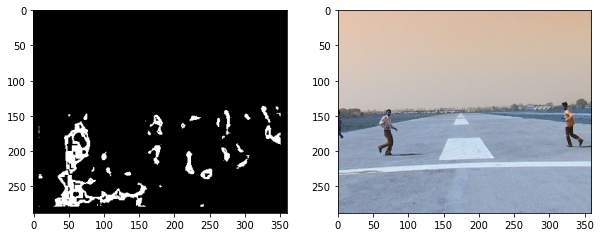

For lambda = 0.74 and eta = 0.74


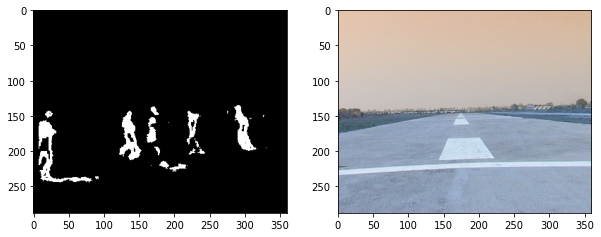

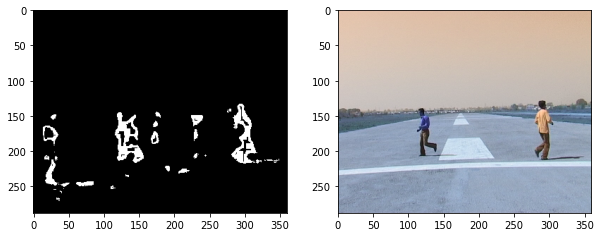

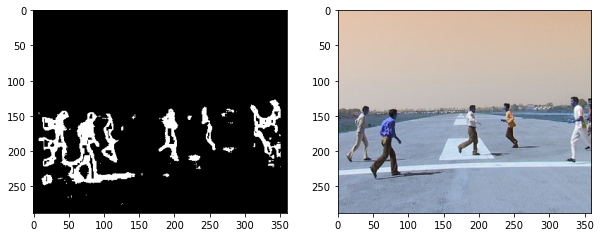

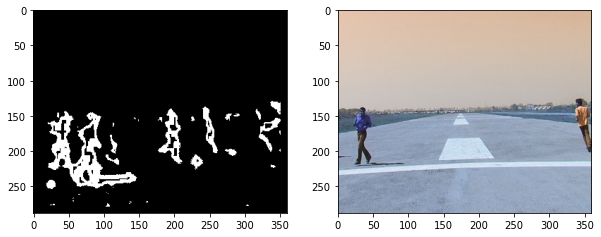

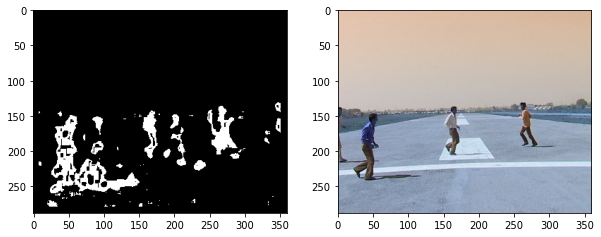

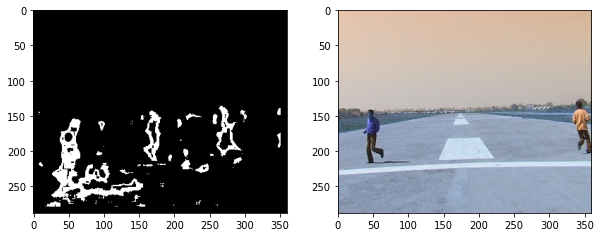

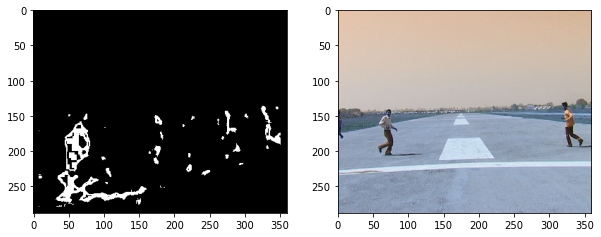

For lambda = 0.76 and eta = 0.76


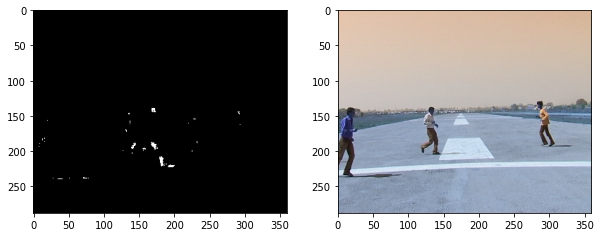

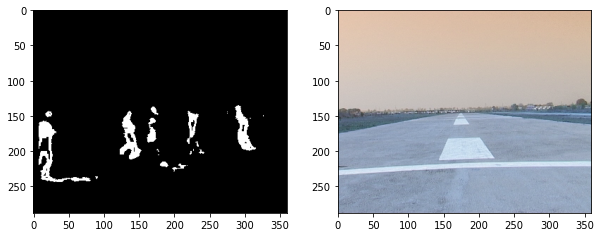

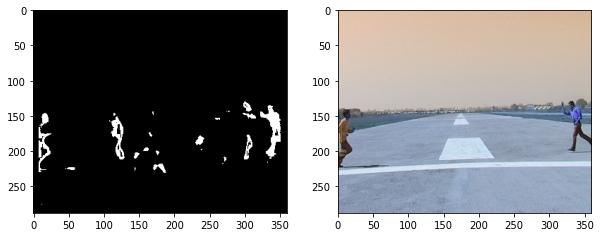

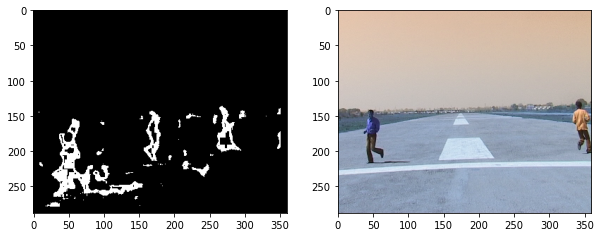

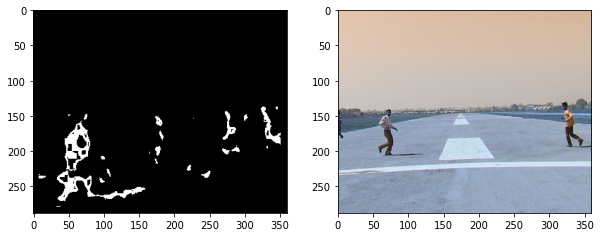

For lambda = 0.78 and eta = 0.78


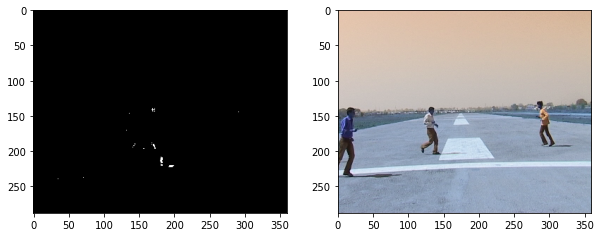

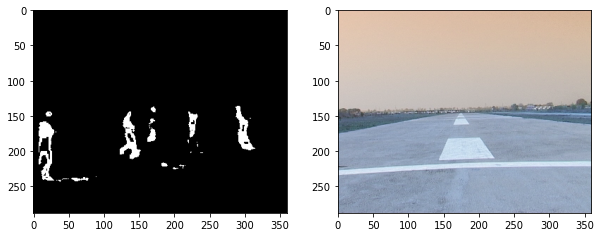

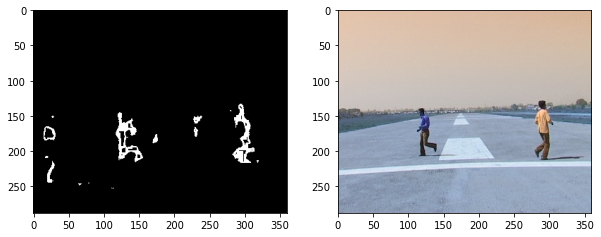

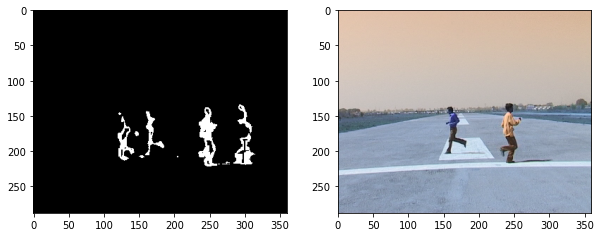

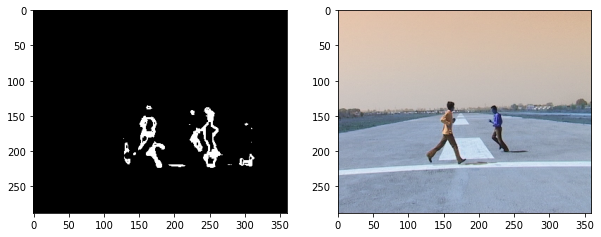

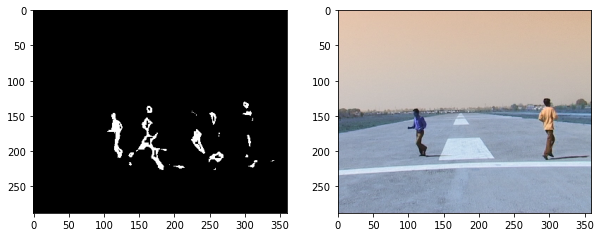

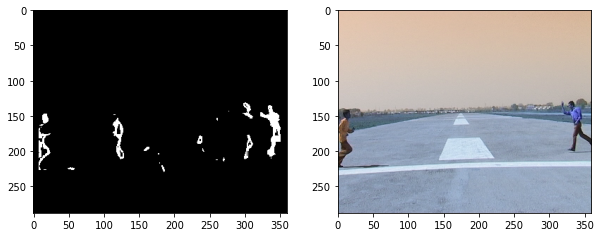

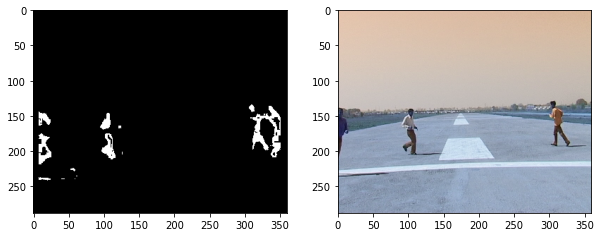

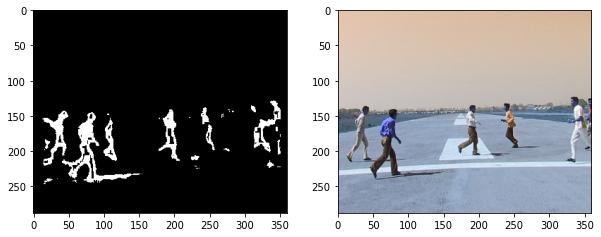

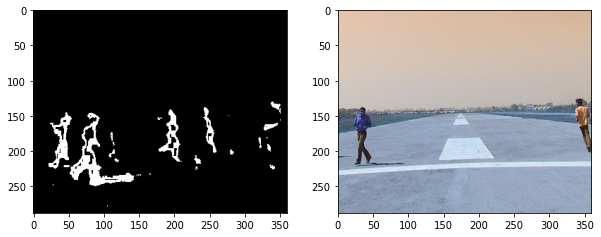

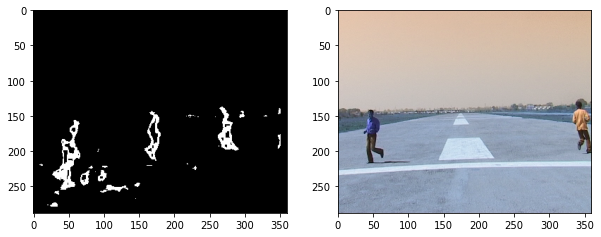

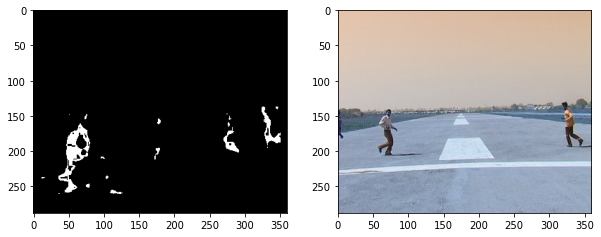

For lambda = 0.8 and eta = 0.8


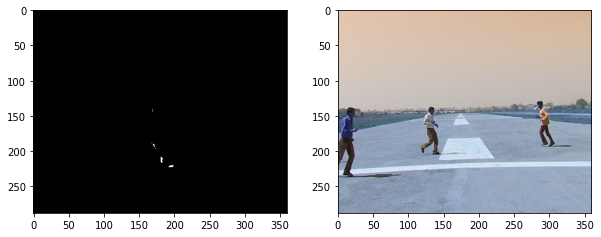

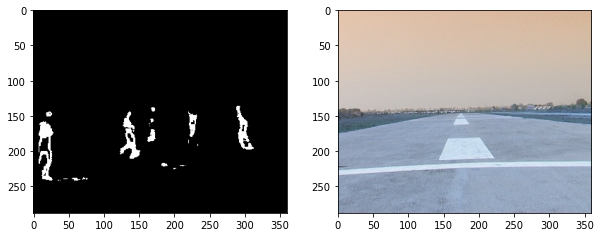

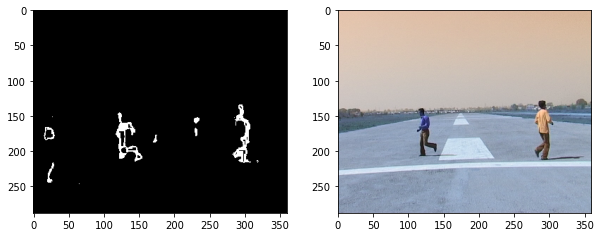

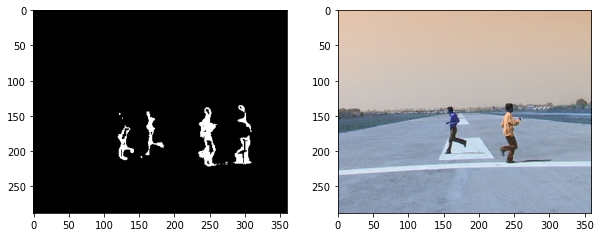

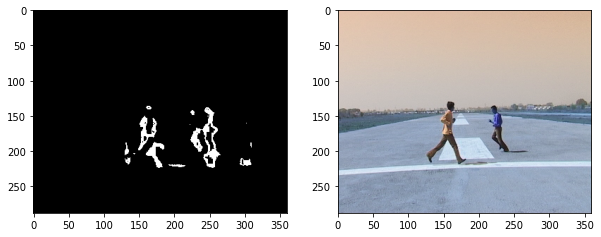

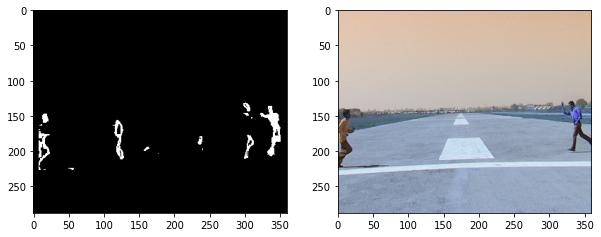

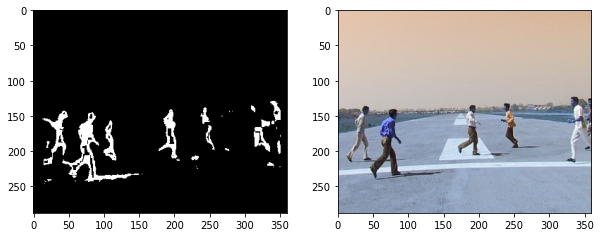

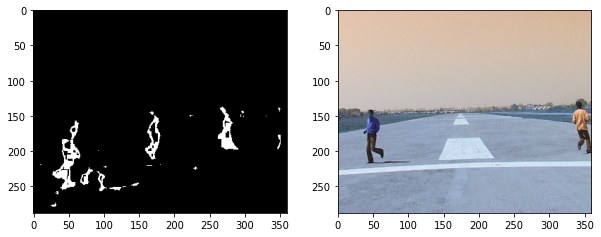

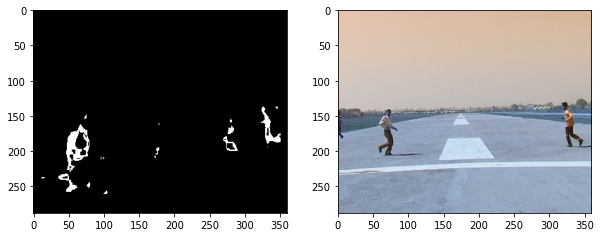

In [18]:
i=0.7
while i<=0.8:
    print("For lambda = {} and eta = {}".format(i,i))
    i+=0.02
    mean,variance = Background_Subtraction("/content/AirStrip Video/Images",i,i,8,8,0.8)